c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\user\AppData\

Found 7000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
219/219 [==============================] - 203s 927ms/step - loss: 0.6476 - acc: 0.6157 - val_loss: 0.4929 - val_acc: 0.7860
Epoch 2/100
219/219 [==============================] - 223s 1s/step - loss: 0.5702 - acc: 0.7056 - val_loss: 0.4326 - val_acc: 0.8110
Epoch 3/100
219/219 [==============================] - 194s 887ms/step - loss: 0.5171 - acc: 0.7433 - val_loss: 0.4171 - val_acc: 0.8170
Epoch 4/100
219/219 [==============================] - 182s 832ms/step - loss: 0.5167 - acc: 0.7529 - val_loss: 0.4165 - val_acc: 0.8150
Epoch 5/100
219/219 [==============================] - 191s 871ms/step - loss: 0.4802 - acc: 0.7740 - val_loss: 0.3858 - val_acc: 0.8310
Epoch 6/100
219/219 [=

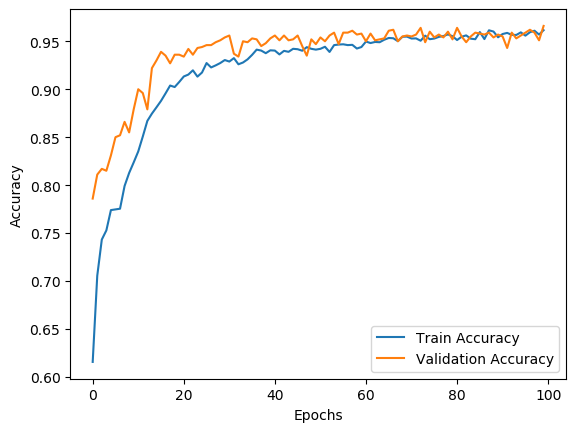

[[333 244]
 [238 185]]
              precision    recall  f1-score   support

           0       0.58      0.58      0.58       577
           1       0.43      0.44      0.43       423

    accuracy                           0.52      1000
   macro avg       0.51      0.51      0.51      1000
weighted avg       0.52      0.52      0.52      1000



In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Define dataset paths
train_dir = "C:/Gender_detection/train"
test_dir = "C:/Gender_detection/test"

# Image size and batch size
img_size = (128, 128)
batch_size = 32

# Enhanced Data Augmentation for Training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.3,  # Increased zoom range
    horizontal_flip=True,
    rotation_range=20,  # Added rotation augmentation
    width_shift_range=0.2,  # Allows random width shift
    height_shift_range=0.2,  # Allows random height shift
    brightness_range=[0.8, 1.2],  # Simulates different lighting conditions
    fill_mode="nearest"
)

# Test data should not have augmentation (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary"
)

# CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
epochs = 100
history = model.fit(train_generator, validation_data=test_generator, epochs=epochs)

# Save the trained model
model.save("gender_detection_model2.h5")

# Plot training history
plt.plot(history.history.get("accuracy", history.history.get("acc")), label="Train Accuracy")
plt.plot(history.history.get("val_accuracy", history.history.get("val_acc")), label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Model Evaluation
test_generator.reset()
y_pred = model.predict(test_generator)
y_pred = np.round(y_pred)

print(confusion_matrix(test_generator.classes, y_pred))
print(classification_report(test_generator.classes, y_pred))
